Just for some quick analyses or visualizations.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-colorblind')
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

In [2]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201008.csv', index_col=0)
merge_df

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.221641,0.269061,49.602848,SO264-13-2,11435
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.961034,0.254319,64.220052,SO264-13-2,11535
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.598575,0.175505,53.523438,SO264-13-2,11835
386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.530931,0.186714,69.532368,SO264-13-2,11935


# Spectrum demo

/home/users/aslee/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


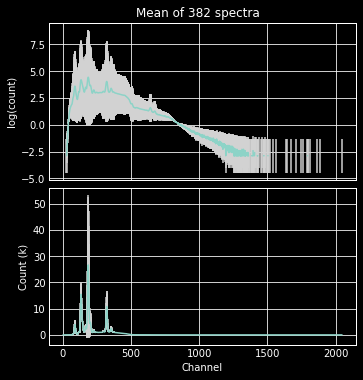

In [39]:
y_mean = merge_df.iloc[:, :2048].mean(axis=0)
y_err = merge_df.iloc[:, :2048].std(axis=0)
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(5.5, 5.5))
ax[0].errorbar(range(2048), np.log10(y_mean), yerr=np.log10(y_err), ecolor='lightgray')
ax[1].errorbar(range(2048), y_mean/1000, yerr=y_err/1000, ecolor='lightgray')
ax[0].set_ylabel('log(count)')
ax[1].set_ylabel('Count (k)')
ax[1].set_xlabel('Channel')
fig.subplots_adjust(hspace=.05, top=.94)
fig.suptitle('Mean of 382 spectra')
fig.savefig('results/spectrum.png')

# Data distribution and correlation 

## Whole dataset

In [25]:
from scipy import stats

#sns.set_style("ticks")
#plt.style.use('dark_background')

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes, size=12)
def maxmin(x, **kws):
    ax = plt.gca()
    ax.annotate("max. = {:.1f}".format(np.max(x)),
                xy=(.4, .9), xycoords=ax.transAxes, size=12)
    ax.annotate("min. = {:.1f}".format(np.min(x)),
                xy=(.4, .8), xycoords=ax.transAxes, size=12)

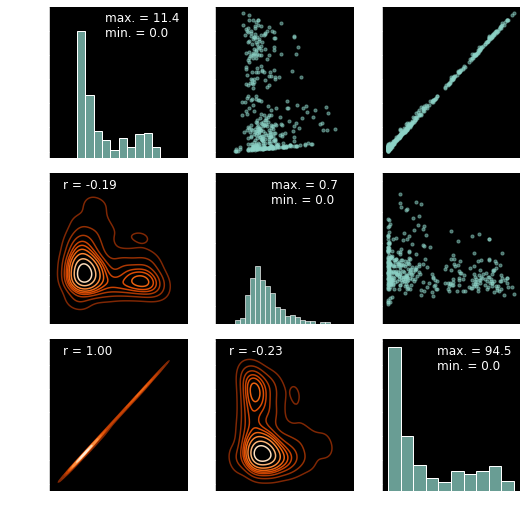

In [55]:
g = sns.PairGrid(merge_df.iloc[:, -5:-2])
g.map_upper(plt.scatter, s=10, alpha=0.5)
g.map_diag(sns.histplot, kde=False)
g.map_diag(maxmin)
g.map_lower(corrfunc)   
g.map_lower(sns.kdeplot, cmap='Oranges_r')

g.savefig('results/bulk_infos_{}.png'.format(date))

## Training and test sets, respectively

In [3]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=24)

train_index, test_index = next(rs.split(merge_df.iloc[:, :2048]))

In [71]:
print(len(train_index), len(test_index))

305 77


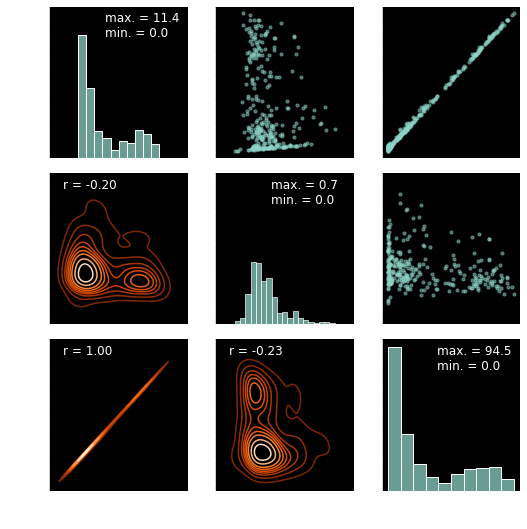

In [56]:
g = sns.PairGrid(merge_df.iloc[train_index, -5:-2])
g.map_upper(plt.scatter, s=10, alpha=0.5)
g.map_diag(sns.histplot, kde=False)
g.map_diag(maxmin)
g.map_lower(corrfunc)   
g.map_lower(sns.kdeplot, cmap='Oranges_r')

g.savefig('results/train_bulk_infos_{}.png'.format(date))

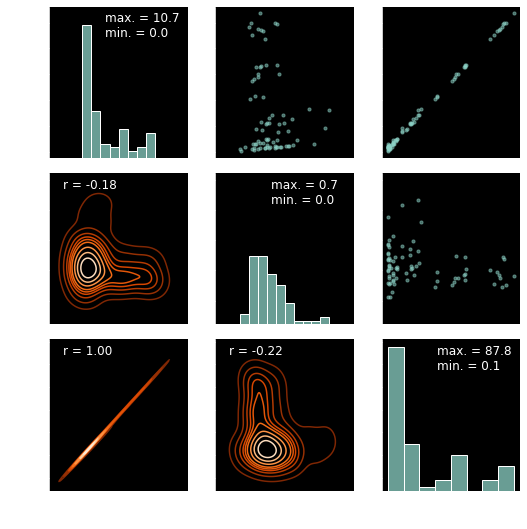

In [57]:
g = sns.PairGrid(merge_df.iloc[test_index, -5:-2])
g.map_upper(plt.scatter, s=10, alpha=0.5)
g.map_diag(sns.histplot, kde=False)
g.map_diag(maxmin)
g.map_lower(corrfunc)   
g.map_lower(sns.kdeplot, cmap='Oranges_r')

g.savefig('results/test_bulk_infos_{}.png'.format(date))

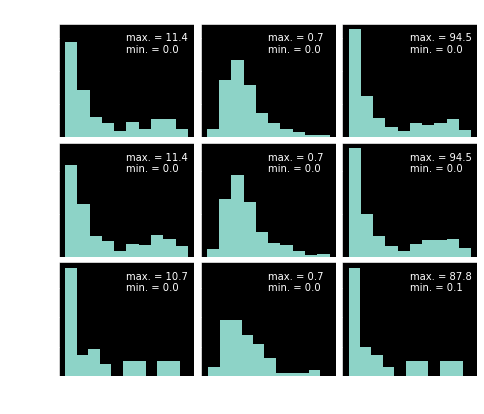

In [60]:
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(7.5, 6))
for col in range(3):
    for row, index in enumerate([range(len(merge_df)), train_index, test_index]):
        axes[row, col].hist(merge_df.iloc[index, -5+col])
        axes[row, col].text(0.5, 0.75, "max. = {:.1f}\nmin. = {:.1f}".format(
            np.max(merge_df.iloc[index, -5+col]), np.min(merge_df.iloc[index, -5+col])), transform=axes[row, col].transAxes)

    #axes[0, i].text(0.5, 0.8, "max. = {:.1f}".format(np.max(merge_df.iloc[:, -5+i])), transform=axes[0, i].transAxes)
    #axes[0, i].text(0.5, 0.8, "max. = {:.1f}".format(np.max(merge_df.iloc[:, -5+i])), transform=axes[0, i].transAxes)
    axes[2, col].set_xlabel(merge_df.columns[-5+col])

axes[0, 0].set_ylabel('Whole set\n(N: {})'.format(len(merge_df)))
axes[1, 0].set_ylabel('Training set\n(N: {})'.format(len(train_index)))
axes[2, 0].set_ylabel('Test set\n(N: {})'.format(len(test_index)))
fig.suptitle('Data distribution')
fig.subplots_adjust(hspace=.05, wspace=.05, top=.94)
fig.savefig('results/bulk_infos_hist_{}.png'.format(date))